In [19]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd

#import modules for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# this will help check accuracy
from sklearn import metrics

#Import models
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

Description
Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)
Source: UCI - 2012
Please cite: UCI

Dataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.

Attribute Information
V1. variance of Wavelet Transformed image (continuous)
V2. skewness of Wavelet Transformed image (continuous)
V3. curtosis of Wavelet Transformed image (continuous)
V4. entropy of image (continuous)

Class (target). Presumably 1 for genuine and 2 for forged

Source: https://www.openml.org/search?type=data&sort=runs&id=1462&status=active

In [2]:
#load data

#the csv file from OpenML does not have a header row, 
#I first opened the file in excel to delete some added info before the data itself
#I could have added my heading in the file too but I chose to do it in the notebook

df = pd.read_csv('Banknote-authentication-datasets.csv', names= ['V1', 'V2', 'V3', 'V4', 'Class'])

#Read the dataframe
df


,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


In [3]:
#Descriptive statistics of the data (all inputs are numerical variables)

df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [4]:
df.shape

(1372, 5)

In [5]:
# Since it's a simple analysis, 
# I decided to drop V3 and V4

df.drop(['V3', 'V4'], axis=1, inplace=True)

In [6]:
df.shape

(1372, 3)

In [7]:
#let's look at our data again

df

,V1,V2,Class
0,3.62160,8.66610,1
1,4.54590,8.16740,1
2,3.86600,-2.63830,1
3,3.45660,9.52280,1
4,0.32924,-4.45520,1
...,...,...,...
1367,0.40614,1.34920,2
1368,-1.38870,-4.87730,2
1369,-3.75030,-13.45860,2
1370,-3.56370,-8.38270,2


In [8]:
# The independent varaibles(x) are the features - V1 and V2
# The dependent variable or target variable, which is what we are trying to predict is the Class

# Feature Selection, exclude the target variable by either dropping it or simply select the section you need by index
x = df.iloc[:,:2]
x
# the first index[:] refers to row and the second index [:2] refers to the columns
# iloc here is saying .... select all rows, then select all columns except the last column (Class)

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [21]:
df.describe()

,V1,V2,Class
count,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.444606
std,2.842763,5.869047,0.497103
min,-7.042100,-13.773100,1.000000
25%,-1.773000,-1.708200,1.000000
50%,0.496180,2.319650,1.000000
75%,2.821475,6.814625,2.000000
max,6.824800,12.951600,2.000000


In [22]:
df.corr()

,V1,V2,Class
V1,1.000000,0.264026,-0.724843
V2,0.264026,1.000000,-0.444688
Class,-0.724843,-0.444688,1.000000


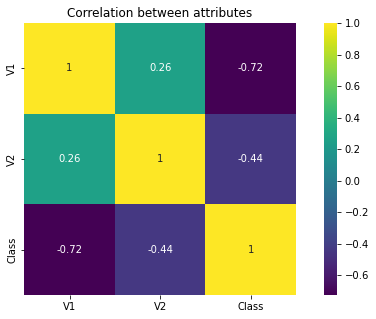

In [26]:
# Plotting a correlation heatmap

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between attributes')
plt.show()

In [9]:
# This is the target variable
# We took out the series [Class]
# Don't forget that each column of the dataframe is a series
y = df['Class']
y

0       1
1       1
2       1
3       1
4       1
       ..
1367    2
1368    2
1369    2
1370    2
1371    2
Name: Class, Length: 1372, dtype: int64

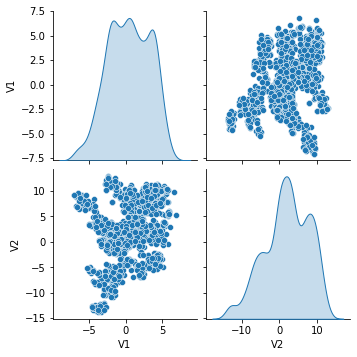

In [18]:
#Visualizations

sns.pairplot(x, diag_kind='kde') 

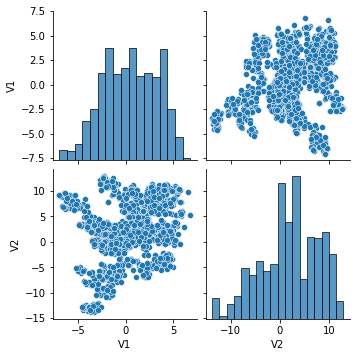

In [27]:
sns.pairplot(x, diag_kind='hist') 

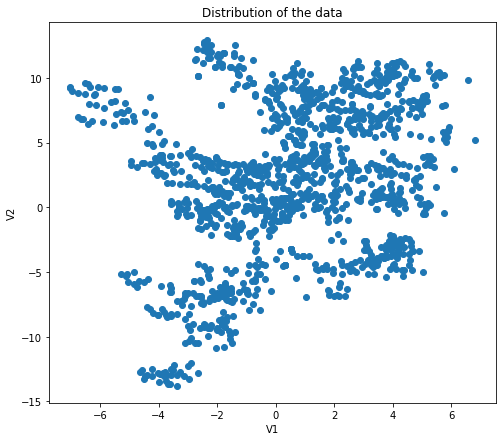

In [28]:
# VIsualize the data

V1 = x['V1']
V2 = x['V2']

plt.figure(figsize = [8, 7])
plt.scatter(V1,V2)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Distribution of the data')

#This enables me to save the figure to my local drive without worrying about taking screeshots
plt.savefig('fig1')

In [12]:
print(x.shape)
print(y.shape)

(1372, 2)
(1372,)


In [13]:
# Modelling with selected features

from sklearn.model_selection import train_test_split

# This step ensures we don't overfit our data, by splitting the data into training and test data
# We will divide it into train(70% of our data) and test(30% of our data)
# Random_state ensures the train and test data remain the same each time we run it
# Without selecting random state, we will keep getting different random selections from our data
# Note that the value, random state=1000, can be anything from 100 and above, so don't worry about it.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1000)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 2)
(412, 2)
(960,)
(412,)


In [49]:
# Here I used a pipeline model to optimize the accuracy
# This pipeline combines logistic regression with KMeans
# Now notice that I set my n_clusters to two because my target variavle has two classes (1 and 2)
from sklearn.pipeline import Pipeline

model = Pipeline([
 ("kmeans", KMeans(n_clusters=2)),
 ("log_reg", LogisticRegression()),
])

#We fit the model on the training data to learn
model.fit(x_train, y_train)


Pipeline(steps=[('kmeans', KMeans(n_clusters=2)),
                ('log_reg', LogisticRegression())])

In [50]:
#Let us predict our target variable: y_pred with our trained model

y_pred = model.predict(x_test)

In [51]:
#Assess the accuracy score

metrics.accuracy_score(y_test, y_pred)

print('Accuracy score:', metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.6432038834951457


In [54]:
#Let's run our KMeans again to get our cluster centers

final_model = KMeans(2)  
final_model.fit(x_train, y_train)
prediction = final_model.predict(x_test)

In [56]:
#Let's see our cluster centers
# Note it's centers not centres (I made this mistake a couple times)

final_model.cluster_centers_

array([[-0.12172281, -3.27430883],
       [ 0.95079155,  6.28281507]])

In [57]:
#Now, let's run our prediction on the entire dataset (x) before we split into training and test data
#We assign it to a variable - predictions
# I used the pipeline model to run the prediction that's why I used model.predict instead of final_model.predict

predictions = model.predict(x)
predictions.shape

(1372,)

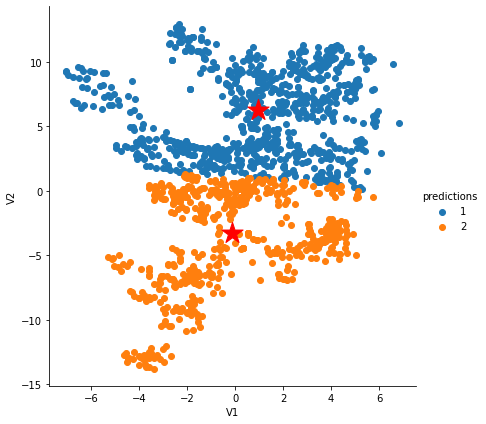

In [60]:
clusters = final_model.cluster_centers_

#Now we use seaborn to visualize the clusters and separate them according to the predictions (using hue as a color code)
# put the assigned labels to the original dataset
df['predictions'] = predictions

graph = sns.FacetGrid(data = df, hue = 'predictions', size = 6)
graph.map(plt.scatter, 'V1', 'V2')
graph.add_legend();
plt.scatter(clusters[:,0], clusters[:,1], s=500, marker='*', c='r')

In [61]:
#This data is what we have represented in the graph above

df.groupby('predictions').describe()

V1                                                            \
             count      mean       std     min       25%       50%       75%   
predictions                                                                    
1            810.0  0.933780  2.907937 -7.0421 -0.895622  1.163000  3.351200   
2            562.0 -0.286969  2.583379 -5.2943 -2.260775 -0.775745  1.739425   

                        V2            ...                     Class            \
                max  count      mean  ...       75%      max  count      mean   
predictions                           ...                                       
1            6.8248  810.0  5.871036  ...  8.705450  12.9516  810.0  1.314815   
2            5.7403  562.0 -3.768809  ... -0.249355   1.2767  562.0  1.631673   

                                                
                  std  min  25%  50%  75%  max  
predictions                                     
1            0.464729  1.0  1.0  1.0  2.0  2.0  
2            0.482781  1.0  1.0  2.0  2.0  2.0  

[2 rows x 24 columns]

In [62]:
df

,V1,V2,Class,predictions
0,3.62160,8.66610,1,1
1,4.54590,8.16740,1,1
2,3.86600,-2.63830,1,2
3,3.45660,9.52280,1,1
4,0.32924,-4.45520,1,2
...,...,...,...,...
1367,0.40614,1.34920,2,1
1368,-1.38870,-4.87730,2,2
1369,-3.75030,-13.45860,2,2
1370,-3.56370,-8.38270,2,2


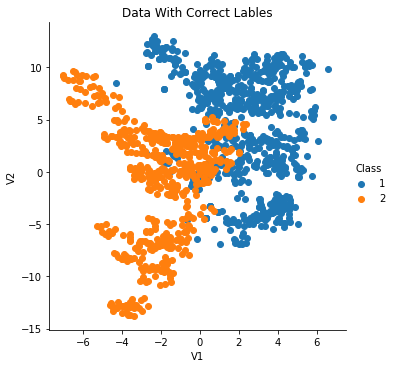

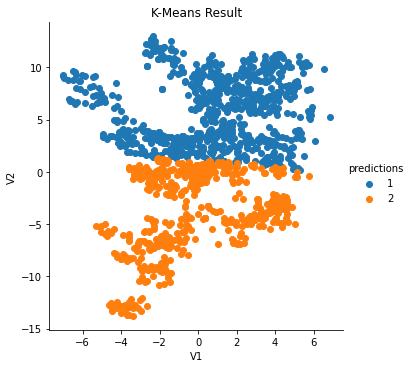

In [70]:
# plot the original data with Correct labels
graph = sns.FacetGrid(data = df, hue = 'Class', size = 5)
graph.map(plt.scatter, 'V1', 'V2')
graph.add_legend()
plt.title("Data With Correct Lables")


# plot the data computed by K-Means
graph = sns.FacetGrid(data = df, hue = 'predictions', size = 5)
graph.map(plt.scatter, 'V1', 'V2')
graph.add_legend()
plt.title("K-Means Result");

#What do you notice?

In [ ]:
# Incase your predcition comes out as 0 and 1 instead of 1 and 2 used for the target variable (Class) in the original data
# You can correct the labels like I did below
df["predictions"] = df["predictions"].map({0: 1, 1: 2})

In [71]:
df

,V1,V2,Class,predictions
0,3.62160,8.66610,1,1
1,4.54590,8.16740,1,1
2,3.86600,-2.63830,1,2
3,3.45660,9.52280,1,1
4,0.32924,-4.45520,1,2
...,...,...,...,...
1367,0.40614,1.34920,2,1
1368,-1.38870,-4.87730,2,2
1369,-3.75030,-13.45860,2,2
1370,-3.56370,-8.38270,2,2


In [74]:
#Let's calculate the accuracy of our prediction
#This simple code simply means:
# 1. Go through the data sequentially starting from the first row to the last
# 2. If you find any row that the Class value is equal to our predicted value- add it to our accuracy_count
# 3. Find the percentage correctness of our accuracy count by diving it with the entire count of the dataset

accuracy_count = 0

for i in range(0,1372):
    if df.Class[i] == df["predictions"][i]:
        accuracy_count+=1
print('Accuracy:', (accuracy_count/1372) *100)

Accuracy: 66.3265306122449
